In [1]:
source("../00_model-fitting/wwa_model-fitting.R")

## **Handy examples of things that don't really have a home anywhere else**

---
### **pdf shift plot**

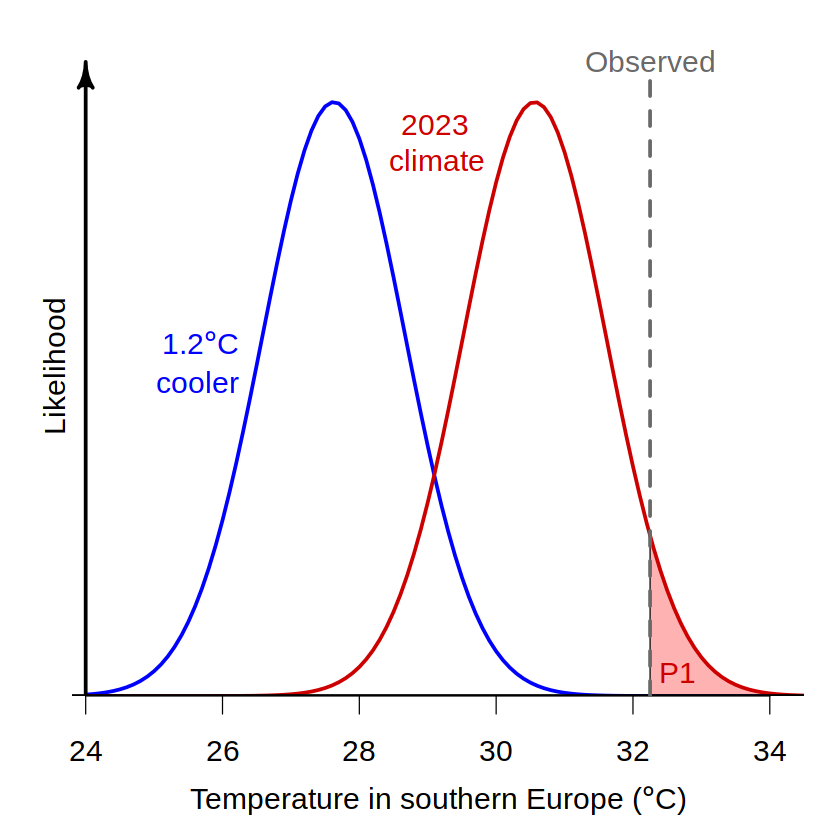

In [3]:
x <- seq(24,34.5,0.1)
xx <- seq(32.25,35,0.01)

# png("pdf-shift.png", height = 480, width = 480); {

    par(cex = 1.5, mar = c(4,2,1,1))

    plot(x, dnorm(x, mean = 27.628, sd = 1.043), type = "l", lwd = 3, col = "blue", xaxs = "i", yaxs = "i", bty = "n", yaxt = "n", xlim = c(23.8,34.5), ylim = c(0,0.425), xlab = "", ylab = "")
    polygon(c(xx, rev(xx)), c(dnorm(xx, mean = 27.628, sd = 1.043), rev(dnorm(xx, mean = 30.562, sd = 1.043))), col = adjustcolor("red", alpha = 0.3))

    lines(x, dnorm(x, mean = 30.562, sd = 1.043), type = "l", lwd = 3, col = "red3")
    abline(h = 0, lwd = 3)

    mtext(expression("Temperature in southern Europe ("*degree*"C)"), side = 1, line = 2.5, cex = 1.5)
    mtext("Likelihood", side = 2, cex = 1.5)
    
    Arrows(24,0,24,0.4, lwd = 3)

    lines(rep(32.25,2), c(0,.4), col = "dimgrey", lty = 2, lwd = 3)
    text(32.25,0.39, "Observed", col = "dimgrey", pos = 3)

    text(26.5,.225, expression("1.2"*degree*"C"), pos = 2, col = "blue")
    text(26.5,.2, expression(cooler), pos = 2, col = "blue")

    text(30.1,.35, "2023  \nclimate", pos = 2, col = "red3")

    text(32.65,.015, "P1", col = "red3")
# }; dev.off()